# Classification of Work Visa Approval

# TECHNOLAB SOFTWARE INTERNSHIP

### Completed EDA and applied Logistic Regression, and Random forest machine learning algorithms.

# TASK BY TANUJ

In [60]:
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [61]:
#In the given dataset, there are 1048547 rows, and 260 columns.
#But only the below 48 columns were considered.

visa_data = pd.read_csv('visaexcel01.csv', usecols=['CASE_NUMBER','CASE_STATUS', 'VISA_CLASS', 'EMPLOYER_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR', 'TOTAL_WORKER_POSITIONS', 'FULL_TIME_POSITION', 'SECONDARY_ENTITY_1','SECONDARY_ENTITY_2','SECONDARY_ENTITY_3','SECONDARY_ENTITY_4', 'SECONDARY_ENTITY_5','SECONDARY_ENTITY_6', 'SECONDARY_ENTITY_7', 'SECONDARY_ENTITY_8', 'SECONDARY_ENTITY_9', 'SECONDARY_ENTITY_10', 'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_FROM_2', 'WAGE_RATE_OF_PAY_FROM_3', 'WAGE_RATE_OF_PAY_FROM_4', 'WAGE_RATE_OF_PAY_FROM_5', 'WAGE_RATE_OF_PAY_FROM_6', 'WAGE_RATE_OF_PAY_FROM_7', 'WAGE_RATE_OF_PAY_FROM_8', 'WAGE_RATE_OF_PAY_FROM_9', 'WAGE_RATE_OF_PAY_FROM_10', 'WAGE_UNIT_OF_PAY_1', 'WAGE_UNIT_OF_PAY_2', 'WAGE_UNIT_OF_PAY_2',  'WAGE_UNIT_OF_PAY_3', 'WAGE_UNIT_OF_PAY_4', 'WAGE_UNIT_OF_PAY_5', 'WAGE_UNIT_OF_PAY_6', 'WAGE_UNIT_OF_PAY_7', 'WAGE_UNIT_OF_PAY_8', 'WAGE_UNIT_OF_PAY_9', 'WAGE_UNIT_OF_PAY_10'])

C:\Users\aakash\anaconda2download\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (0,1,5,6,7,8,9,13,14,19,31,45,53,55,66,76,87,97,108,129,150,160,171,192,213,223,234,244,254,255,256) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [62]:
visa_data

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,WAGE_UNIT_OF_PAY_8,SECONDARY_ENTITY_9,WAGE_RATE_OF_PAY_FROM_9,WAGE_UNIT_OF_PAY_9,SECONDARY_ENTITY_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_UNIT_OF_PAY_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B
0,I-200-16092-327771,WITHDRAWN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,NaN
1,I-203-17188-450729,WITHDRAWN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,1.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Only H-1B Visa class is considered. Rest all other visa classes are removed
visa_data.drop(visa_data[visa_data['VISA_CLASS']=='E-3 Australian'].index, inplace=True)
visa_data.drop(visa_data[visa_data['VISA_CLASS']=='H-1B1 Singapore'].index, inplace=True)
visa_data.drop(visa_data[visa_data['VISA_CLASS']=='H-1B1 Chile'].index, inplace=True)

#Dropped the rows which consists null values in the "Visa_class"
visa_data.drop(visa_data[visa_data['VISA_CLASS'].isnull()].index, inplace=True)

In [64]:
#Dropped the rows which consists of either "Withdrawn" or "Cerified-Withdrawn" as "Case_Status"
#Replaced "Certified" as 1 and "Denied" as 0
visa_data.drop(visa_data[visa_data['CASE_STATUS']=='WITHDRAWN'].index, inplace=True)
visa_data.drop(visa_data[visa_data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index, inplace=True)
visa_data['CASE_STATUS'].replace({'CERTIFIED':1, 'DENIED':0}, inplace=True)

## Handling missing values and incorrect data

In [65]:
# Tried checking if any Case_Number is in the wrong format
visa_data[visa_data['CASE_NUMBER'].str.match("I-[0-9][0-9][0-9]-[0-9][0-9][0-9][0-9][0-9]-[0-9][0-9][0-9][0-9][0-9][0-9]")==False].index #No anamolies found

# Tried checking if any SOC_CODE is in the wrong format
visa_data[visa_data['SOC_CODE'].str.match("[0-9][0-9]-[0-9][0-9][0-9][0-9]")==False].index #found anamoly
visa_data.at[664611, 'SOC_CODE'], visa_data.at[664611, 'SOC_TITLE'] = visa_data.at[664611, 'SOC_TITLE'], visa_data.at[664611, 'SOC_CODE'] #Resolved it

In [66]:
# No SOC_CODE and SOC_TITLE was there for the below four cell indexes.
# Added SOC_Code and SOC_Title to the below four cells by using their Job_Title
visa_data.at[664612, 'SOC_CODE'], visa_data.at[664612, 'SOC_TITLE']='15-1132', 'SOFTWARE DEVELOPERS, APPLICATIONS'
visa_data.at[664614, 'SOC_CODE'], visa_data.at[664614, 'SOC_TITLE']='15-1132', 'SOFTWARE DEVELOPERS, APPLICATIONS'

visa_data.at[664613, 'SOC_CODE'], visa_data.at[664613, 'SOC_TITLE']='15-1121', 'COMPUTER SYSTEMS ANALYSTS'
visa_data.at[664615, 'SOC_CODE'], visa_data.at[664615, 'SOC_TITLE']='15-1121', 'COMPUTER SYSTEMS ANALYSTS'

In [67]:
# Tried checking for null values in 'FULL_TIME_POSITION' column.
visa_data[visa_data['FULL_TIME_POSITION'].str.match("Y|N")==False].index

Int64Index([], dtype='int64')

In [68]:
# Tried checking for null values in 'NEW_CONCURRENT_EMPLOYMENT' column.
visa_data[visa_data['NEW_CONCURRENT_EMPLOYMENT'].isnull()].index # null value found
visa_data.drop(307174, inplace=True) # resolved it

In [69]:
# Tried checking for null values in ''CHANGE_EMPLOYER'' column.
visa_data[visa_data['CHANGE_EMPLOYER'].isnull()].index #no anamolies

# Tried checking for null values in 'AMENDED_PETITION' column.
visa_data[visa_data['AMENDED_PETITION'].isnull()].index #no anamolies

# Tried checking for null values in 'EMPLOYER_NAME' column.
visa_data[visa_data['EMPLOYER_NAME'].isnull()].index #null value found
visa_data.drop(visa_data[visa_data['EMPLOYER_NAME'].isnull()].index, inplace=True)

In [71]:
# Tried checking for null values in ''AGENT_REPRESENTING_EMPLOYER'' column.
visa_data[visa_data['AGENT_REPRESENTING_EMPLOYER'].isnull()].index #found null values
visa_data.drop(visa_data[visa_data['AGENT_REPRESENTING_EMPLOYER'].isnull()].index, inplace=True) #resolved it

In [72]:
# converted cell values from string to float  in "CONTINUED_EMPLOYMENT" column.
visa_data["CONTINUED_EMPLOYMENT"] = visa_data["CONTINUED_EMPLOYMENT"].astype(float, copy=True, errors='ignore')

In [73]:
a=['SECONDARY_ENTITY_1', 'SECONDARY_ENTITY_2', 'SECONDARY_ENTITY_3', 'SECONDARY_ENTITY_4', 'SECONDARY_ENTITY_5', 'SECONDARY_ENTITY_6', 'SECONDARY_ENTITY_7','SECONDARY_ENTITY_8', 'SECONDARY_ENTITY_9', 'SECONDARY_ENTITY_10']

b=['WAGE_UNIT_OF_PAY_1', 'WAGE_UNIT_OF_PAY_2', 'WAGE_UNIT_OF_PAY_3', 'WAGE_UNIT_OF_PAY_4', 'WAGE_UNIT_OF_PAY_5', 'WAGE_UNIT_OF_PAY_6', 'WAGE_UNIT_OF_PAY_7', 'WAGE_UNIT_OF_PAY_8', 'WAGE_UNIT_OF_PAY_9', 'WAGE_UNIT_OF_PAY_10']

c=['WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_FROM_2', 'WAGE_RATE_OF_PAY_FROM_3', 'WAGE_RATE_OF_PAY_FROM_4', 'WAGE_RATE_OF_PAY_FROM_5', 'WAGE_RATE_OF_PAY_FROM_6', 'WAGE_RATE_OF_PAY_FROM_7', 'WAGE_RATE_OF_PAY_FROM_8', 'WAGE_RATE_OF_PAY_FROM_9','WAGE_RATE_OF_PAY_FROM_10']

In [74]:
# The Secondary_entity will be 'Y', if the 'WAGE_RATE_OF_PAY_FROM' and 'WAGE_UNIT_OF_PAY' is not null.
for i in range(10):
    visa_data.loc[(visa_data[c[i]].notnull()) & (visa_data[b[i]].notnull()) &(visa_data[a[i]].isnull()), a[i]] = "Y"

In [75]:
#The i'th secondary entity will be 'N', if (i+1), (i+2), ..., (i+n)th secondary entities are null

def removenull(m):
    for i in range(m,10): p=visa_data[a[i]].isnull() & visa_data[b[i]].isnull() & visa_data[c[i]].isnull()
    return p

for i in range(10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(1, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(2, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(3, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(4, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(5, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(6, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(7, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(8, 10): visa_data.loc[removenull(i), a[i]]='N'
for i in range(9, 10): visa_data.loc[removenull(i), a[i]]='N'

In [76]:
# The seconday_entity will be 'Y', if 'Wage_unit_of_pay' and 'wage_unit_of_pay_from' are not null.
for i in range(10):
    visa_data.loc[(visa_data[c[i]].notnull()) & (visa_data[a[i]]=='N'), a[i]]='Y'

# Finding missing values in the wage_unit_of_pay column.
for i in range(10):
    if len(visa_data[(visa_data[c[i]].notnull()) & (visa_data[b[i]].isnull())])>0:
        print(i+1)
## Found anamolies at 4th, 5th, 7th, 8th iteration
x=[4,5,7,8]
for i in x:
    visa_data.loc[(visa_data[c[i-1]].notnull()) & (visa_data[b[i-1]].isnull()), b[i-1]]='Year'
## Resolved it

4
5
7
8


### Converting values into float

In [77]:
#Removing dollar, and comma signs
#And converting it to float values

for i in range(10):
    visa_data[c[i]]=visa_data[c[i]].replace({'\$': '', ',': ''}, regex=True)
    visa_data[c[i]]=visa_data[c[i]].astype(float)


In [78]:
# Tried checking for null values in the 'H-1B_DEPENDENT' column.

visa_data['H-1B_DEPENDENT'].isnull().sum() #found null value
visa_data.drop(visa_data[visa_data['H-1B_DEPENDENT'].isnull()].index, inplace=True)
visa_data.drop(231476, inplace=True)

### Observing Case_Status

<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

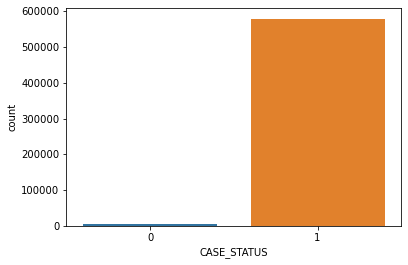

In [79]:
#By observing the below plot, we can conclude that the acceptance performace is very high.
sns.countplot(x='CASE_STATUS', data=visa_data)

### Data Encoding

In [80]:
#A separate dataframe 'testing' is created
#dummies were added in the place of string values
visa_data['FULL_TIME_POSITION'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['H-1B_DEPENDENT'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['WILLFUL_VIOLATOR'].replace({'Y':1, 'N':0}, inplace=True)
visa_data['AGENT_REPRESENTING_EMPLOYER'].replace({'Y':1, 'N':0}, inplace=True)

# Representing Y as 1 and N as 0 in secondary_entity column.
for i in range(10):
    visa_data[a[i]].replace({'Y':1, 'N':0}, inplace=True)

#reprsenting 'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5 in wage_unit_of_pay column
for i in range(10):
    visa_data[b[i]].replace({'Hour':1, 'Week':2, 'Bi-Weekly':3, 'Month':4, 'Year':5}, inplace=True)


le = LabelEncoder()
visa_data.JOB_TITLE = le.fit_transform(visa_data.JOB_TITLE)
visa_data.EMPLOYER_NAME = le.fit_transform(visa_data.EMPLOYER_NAME)
visa_data.SOC_CODE = le.fit_transform(visa_data.SOC_CODE)
visa_data.SOC_TITLE = le.fit_transform(visa_data.SOC_TITLE)
visa_data.NAICS_CODE = le.fit_transform(visa_data.NAICS_CODE)
visa_data.SUPPORT_H1B = le.fit_transform(visa_data.SUPPORT_H1B)

testing = visa_data.copy(deep=True)

sum_secondary_entity = testing[a[0]]
for i in range(1,10):
    sum_secondary_entity+=testing[a[i]]

testing['SUM_SECONDARY_ENTITY'] = sum_secondary_entity

## Removing Outliers

In [81]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [82]:
# Removing outliers in salary
for i in range(10):
    lowincome, uppincome = remove_outlier(testing[c[i]])
    testing[c[i]] = np.where(testing[c[i]]>uppincome, uppincome, testing[c[i]])
    testing[c[i]] = np.where(testing[c[i]]<lowincome, lowincome, testing[c[i]])

<AxesSubplot:xlabel='CASE_STATUS', ylabel='AMENDED_PETITION'>

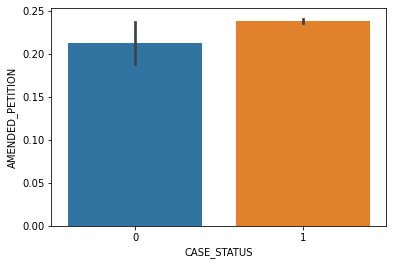

In [83]:
sns.barplot(x='CASE_STATUS', y='AMENDED_PETITION', data=testing)

<AxesSubplot:>

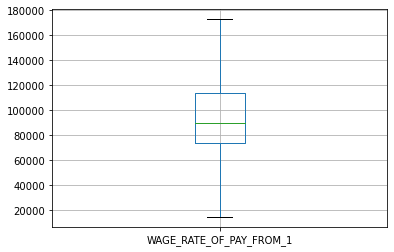

In [84]:
testing.boxplot('WAGE_RATE_OF_PAY_FROM_1')

# Bar Plot

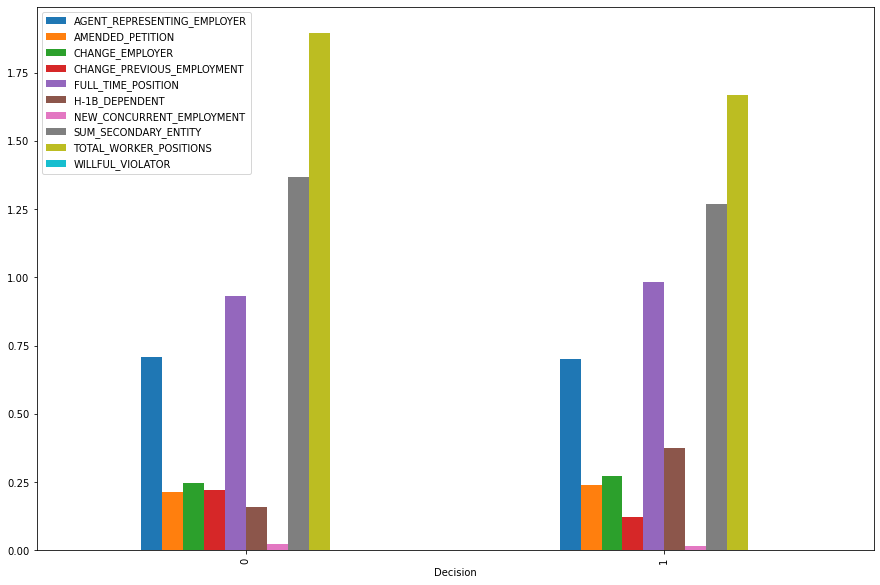

In [85]:
df_pivot = pd.pivot_table(
    testing,
    values=["FULL_TIME_POSITION", "TOTAL_WORKER_POSITIONS", "CHANGE_PREVIOUS_EMPLOYMENT", "NEW_CONCURRENT_EMPLOYMENT", "CHANGE_EMPLOYER", "AMENDED_PETITION", "AGENT_REPRESENTING_EMPLOYER", "H-1B_DEPENDENT", "WILLFUL_VIOLATOR", "SUM_SECONDARY_ENTITY"],
    index="CASE_STATUS",
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15, 10)
ax.set_xlabel("Decision")
plt.show()

# Logistic Regression

In [87]:
## Logistic Regression

# For Logistic regression [19], we select the features [9] SECONDARY_ENTITY, AGENT_REPRESENTING_EMPLOYER, TOTAL_WORKERS, NEW_EMPLOYMENT, CONTINUED_EMPLOYMENT, CHANGE_PREVIOUS_EMPLOYMENT, NEW_CONCURRENT_EMPLOYMENT, CHANGE_EMPLOYER, AMENDED_PETITION,FULL_TIME_POSITION, H1B_DEPENDENT and WILLFUL_VIOLATOR. Probability of outcome (y) given by:

x=testing.iloc[:, [6, 7, 10, 11, 12, 13, 16, 47, 48, 50]]
y=testing['CASE_STATUS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=75)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

In [88]:
confusion_matrix(y_test, predictions)

array([[     1,   3590],
       [     2, 405050]], dtype=int64)

In [89]:
#The accouracy is:
accuracy_score(y_test, predictions)

0.9912099314071207

# Random Forest 

In [90]:
#Random Forest

# For Random forest model, the model was generated using a 50% mix of approved and rejected cases. For this, entire rejected cases and randomly sampled equal count of approved cases was chosen.


approved_cases = testing[testing['CASE_STATUS']==1]
rejected_cases = testing[testing['CASE_STATUS']==0]

rf_test_data = [rejected_cases, approved_cases.sample(len(rejected_cases))]
rf_test_data = pd.concat(rf_test_data)

x_train, x_test, y_train, y_test = train_test_split(rf_test_data.iloc[:, [3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 47, 48, 49, 50]], rf_test_data['CASE_STATUS'], test_size=0.7, random_state=50 )

model=RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.6665740097289785

## Random forest Confusion matrix and Accuracy: 

In [91]:
confusion_matrix(y_test, predictions)

array([[2492, 1117],
       [1282, 2304]], dtype=int64)